<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/APGAR_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  DATA DESCRIPTION

Dataset from  [Judd, McClelland, and Ryan (2011)](https://www.routledge.com/Data-Analysis-A-Model-Comparison-Approach-To-Regression-ANOVA-and-Beyond/Judd-McClelland-Ryan/p/book/9781138819832)



APGAR, developed by Virginia Apgar, stands for Activity, Pulse, Grimace, Appearance, Respiration (APGAR). The APGAR score summarizes the health of newborn children.

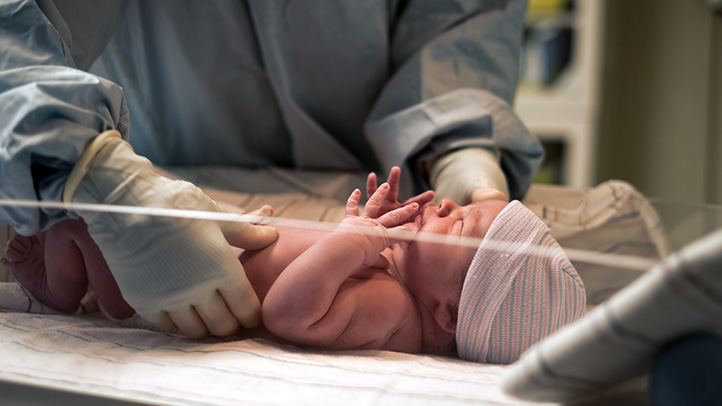


Description of Relevant Variables:


*   Apgar(scores from 1-10)

*   Maternal Weight Gain(in pounds)
*   Gestastional Age(in weeks)


*   Birth Weight(in grams)

# Hypothesis
H0: Maternal Weight, Gestastional Age, and Birth Weight are all not predictors of a apgar score, and their partial regression coefficients are equal to zero.



H1: At least one of the three variables(Maternal Weight, Gestastional Age, and Birth Weight) is a predictor of apgar score, and at least one of the partial regression coefficients is not equal to zero.

# SUMMARY STATISTICS

In [ ]:
# Install and Load Packages
library(tidyverse)
install.packages('car')
library(car)
install.packages('psych')
library(psych)

In [4]:
# Load dataset
apgar= read.csv('apgar_2014 (1).csv')
glimpse(apgar)

Rows: 54
Columns: 12
$ obs            <int> 54, 2, 45, 23, 53, 51, 44, 48, 43, 31, 5, 22, 52, 14, 4…
$ case           <int> 60, 59, 58, 57, 52, 54, 55, 48, 49, 50, 47, 46, 45, 41,…
$ birthweight    <int> 2, 4, 4, 5, 5, 6, 5, 5, 6, 5, 7, 4, 5, 4, 6, 5, 3, 7, 5…
$ apgar          <int> 1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6…
$ gender         <int> 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2…
$ smokes         <int> 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0…
$ smokescontrast <int> -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1…
$ wtgain         <int> 10, 50, 13, 75, 8, 12, 25, 10, 15, 45, 24, 28, 35, 32, …
$ gestat         <int> 34, 38, 34, 38, 34, 35, 39, 34, 35, 38, 39, 40, 42, 35,…
$ prenat         <int> 3, 1, 1, 2, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 3…
$ annicn         <int> 45, 12, 98, 56, 56, 97, 31, 34, 32, 160, 97, 21, 34, 11…
$ lgincome       <dbl> 3.806662, 2.484907, 4.584967, 4.025352, 4.025352, 4.574…


In [8]:
describe(apgar)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
obs,1,54,27.5000000,15.7321327,27.500000,27.5000000,20.015100,1.000000,54.000000,53.000000,0.00000000,-1.26684250,2.14087210
case,2,54,28.6851852,17.3148688,27.500000,28.2954545,20.756400,1.000000,60.000000,59.000000,0.16334853,-1.18378592,2.35625520
birthweight,3,54,5.5370370,1.2546211,5.500000,5.5454545,0.741300,2.000000,8.000000,6.000000,-0.16665253,-0.03787617,0.17073230
apgar,4,54,6.8703704,2.1195077,7.000000,7.0000000,1.482600,1.000000,10.000000,9.000000,-0.59182057,-0.11755070,0.28842847
gender,5,54,1.5000000,0.5046949,1.500000,1.5000000,0.741300,1.000000,2.000000,1.000000,0.00000000,-2.03669410,0.06868028
smokes,6,54,0.2592593,0.4423430,0.000000,0.2045455,0.000000,0.000000,1.000000,1.000000,1.06832280,-0.87384627,0.06019526
smokescontrast,7,54,0.4814815,0.8846861,1.000000,0.5909091,0.000000,-1.000000,1.000000,2.000000,-1.06832280,-0.87384627,0.12039053
wtgain,8,54,25.5185185,10.9212287,24.500000,24.5454545,8.154300,8.000000,75.000000,67.000000,1.80914598,6.00378937,1.48619098
gestat,9,54,38.1851852,2.1898055,38.000000,38.2500000,2.223900,34.000000,42.000000,8.000000,-0.23197192,-0.72804871,0.29799478


In [42]:
# Apgar Score
round(mean(apgar$apgar),2)
round(median(apgar$apgar),2)
round(sd(apgar$apgar),2)

[1] 6.87

[1] 7

[1] 2.12

In [38]:
# Birthweight
round(mean(apgar$birthweight),2)
round(median(apgar$birthweight),2)
round(sd(apgar$birthweight),2)

[1] 5.54

[1] 5.5

[1] 1.25

In [40]:
# Weight Gain
round(mean(apgar$wtgain),2)
round(median(apgar$wtgain),2)
round(sd(apgar$wtgain),2)

[1] 25.52

[1] 24.5

[1] 10.92

In [41]:
# Gestastional Age
round(mean(apgar$gestat),2)
round(median(apgar$gestat),2)
round(sd(apgar$gestat),2)

[1] 38.19

[1] 38

[1] 2.19

# DATA VISUALIZATION

In [1]:
library(ggplot2)

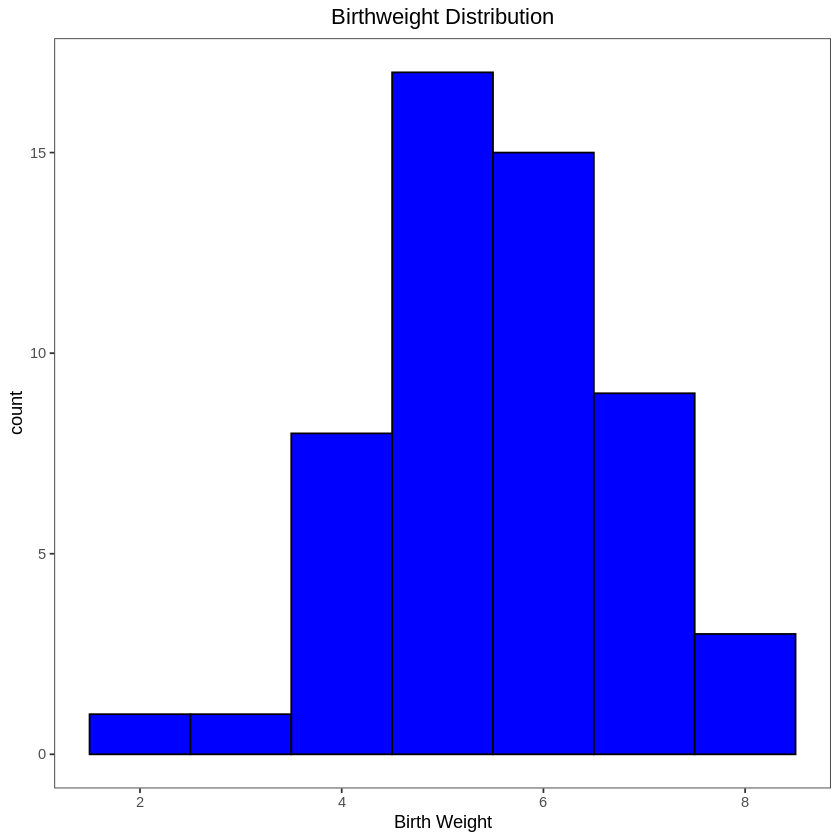

In [10]:
ggplot(apgar)+geom_histogram(aes(x= birthweight), fill= 'blue', color= 'black', binwidth = 1)+ xlab('Birth Weight')+ ggtitle('Birthweight Distribution')+ theme_bw()+ theme(panel.grid = element_blank(), plot.title = element_text(hjust= 0.5))

In [23]:
max(apgar$wtgain)

[1] 75

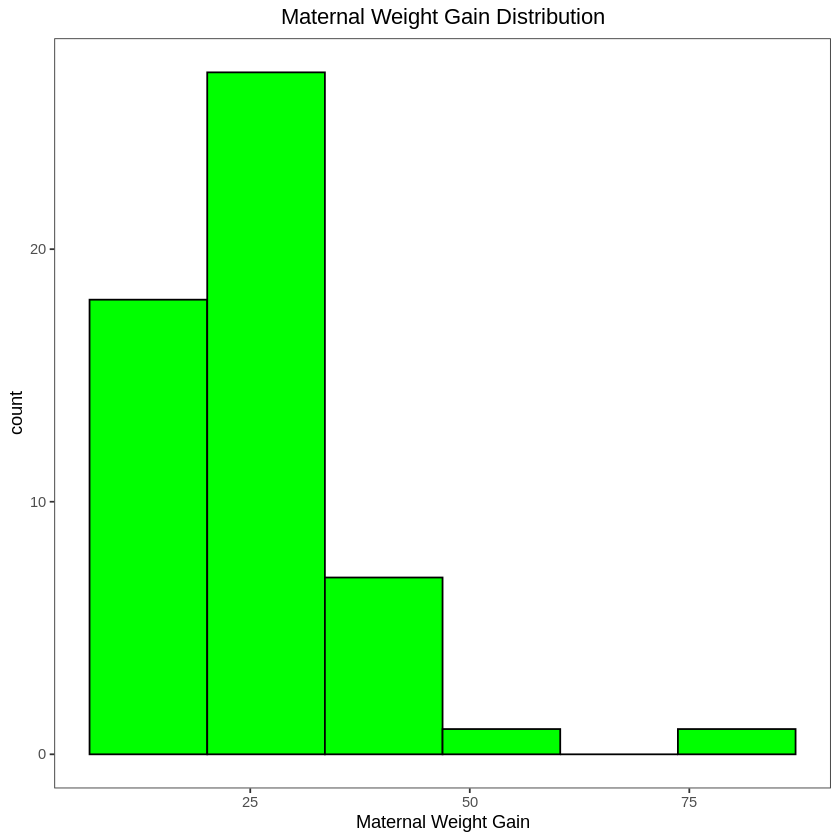

In [33]:
ggplot(apgar)+geom_histogram(aes(x= wtgain), fill= 'green', color= 'black', bins= 6)+ xlab('Maternal Weight Gain')+ ggtitle('Maternal Weight Gain Distribution') +theme_bw()+ theme(panel.grid= element_blank(), plot.title= element_text(hjust= 0.5))

In [29]:
max(apgar$gestat)

[1] 42

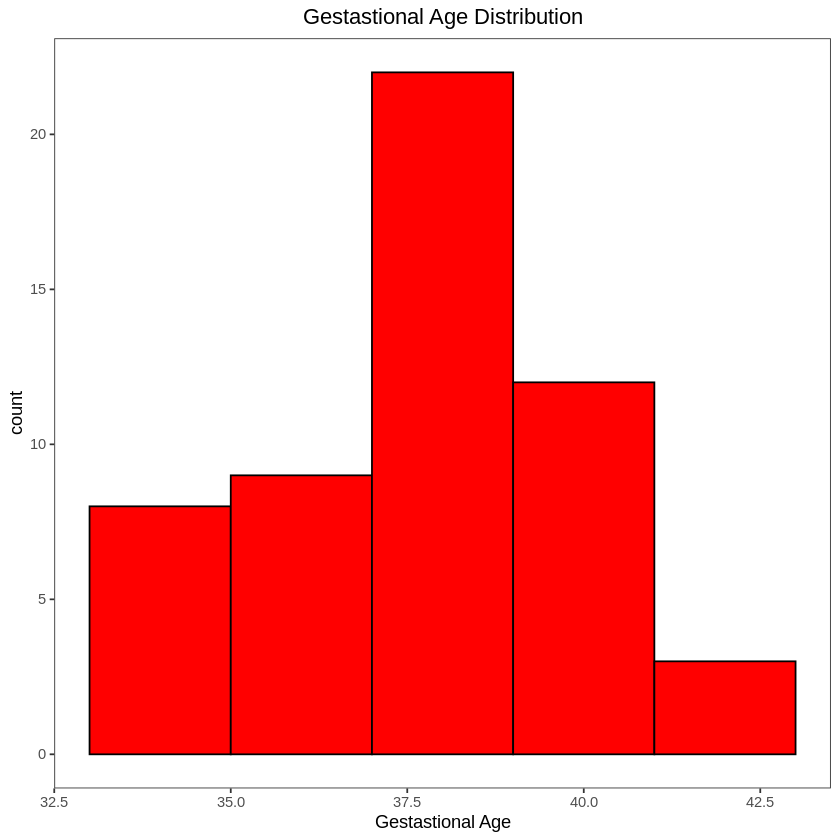

In [28]:
ggplot(apgar)+geom_histogram(aes(x= gestat), fill= 'red', color= 'black', bins= 5)+ xlab('Gestastional Age')+ ggtitle('Gestastional Age Distribution') +theme_bw()+ theme(panel.grid= element_blank(), plot.title= element_text(hjust= 0.5))

# STATISTICAL ASSUMPTIONS



*  Normality of population
*  Homogeneity of Variance

*   Multicollinearity


In [9]:
# Normality Test
shapiro.test(resid(lm(apgar~ birthweight + gestat + wtgain, data= apgar)))
# Since the p-value for this test is non-significant, we have no concerns about the normality of our dataset.


	Shapiro-Wilk normality test

data:  resid(lm(apgar ~ birthweight + gender + gestat + wtgain, data = apgar))
W = 0.97246, p-value = 0.2468


In [10]:
# Homogeneity Test
ncvTest(lm(apgar~ birthweight + gestat + wtgain, data= apgar))
# Since the p-value for this test is non-significant, we have no concerns about the homogeneity of variance.

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.168786, Df = 1, p = 0.27965

In [13]:
# Multicollinearity Test
cor.test(apgar$wtgain, apgar$birthweight, apgar$gestat, alternative = "two.sided", method = "pearson")
# Since the p-value for this test is non-significant, we have no concerns about multicollinearity of the selected predictors.


	Pearson's product-moment correlation

data:  apgar$wtgain and apgar$birthweight
t = -0.56812, df = 52, p-value = 0.5724
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3391689  0.1932843
sample estimates:
       cor 
-0.0785411 


# HYPOTHESIS TESTING

In [14]:
# Comparison distribution
dfNumerator= 3
dfDenominator= 54-4

CUTOFF VALUE

In [15]:
qf(0.05, dfNumerator, dfDenominator)

[1] 0.1165061

In [16]:
summary(lm(apgar~ birthweight+ wtgain+ gestat, data= apgar))
# Since the F(50)= 7.79, we can reject the null hypothesis since this value is above our cutoff value of 0.12.


Call:
lm(formula = apgar ~ birthweight + wtgain + gestat, data = apgar)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0815 -1.4400  0.2344  1.3610  3.8382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -8.20479    4.38637  -1.871  0.06727 . 
birthweight  0.57344    0.20807   2.756  0.00814 **
wtgain      -0.04274    0.02406  -1.776  0.08177 . 
gestat       0.34020    0.12431   2.737  0.00857 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.801 on 50 degrees of freedom
Multiple R-squared:  0.3185,	Adjusted R-squared:  0.2776 
F-statistic:  7.79 on 3 and 50 DF,  p-value: 0.0002304


# Regression Equation


Pred_Apgar_Score= 0.57(birthweight) + 0.34(gestat) - 0.04(wtgain) - 8.20

# POST ANALYSIS WRAP UP

A multiple regression analysis was conducted to predict apgar scores from birthweight, gestastional age, and maternal weight gain. As hypothesized, some effects from the model are statistically significant, F(3, 50) = 7.79, p = .0002. The adjusted R2
 = .28, meaning that both predictors collectively explain 28% of the variability in apgar scores. Looking at the individual predictors, birthweight(b = 0.57, t(50) = 2.76, p = .008) and gestastional age(b= 0.34, t(50)= 2.74 , p= .008) significantly predicted apgar scores. Maternal weight gain did not statistically significantly predict apgar scores, b = -0.04, t(50) = -1.78, p = .09. See summary statistics for means and standard deviations.